<a href="https://colab.research.google.com/github/ahcamachod/miscellaneous/blob/main/open_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Clasificación de Rostros: Visión por Computador con OpenCV

En este notebook estaremos desarrollando el código para trabajar con análisis facial utilizando Open Computer Vision.

Emplearemos algunas imágenes para realizar los ejercicios, y particularmente, tomaremos como referencia una base de imágenes de Georgia Tech (*http://www.anefian.com/research/gt_db.zip*).

La documentación referente a los principales paquetes que estaremos usando se relaciona a continuación:

* *https://docs.opencv.org/4.x/*
* *http://dlib.net/python/*

## 1. Conociendo el problema

In [ ]:
import cv2
from google.colab import drive
import matplotlib.pyplot as plt



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
imagen = cv2.imread("/content/drive/MyDrive/imagenes/px-girl.jpg")

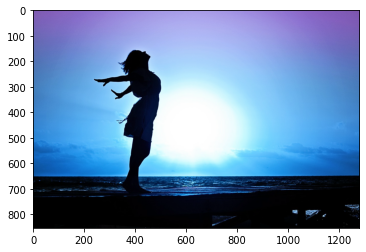

In [27]:
plt.imshow(imagen)

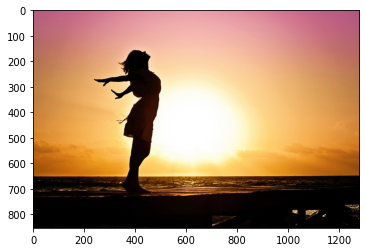

In [29]:
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb)

In [31]:
imagen_rgb.shape

(853, 1280, 3)

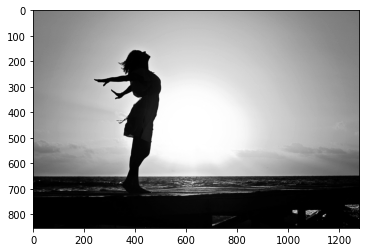

In [33]:
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(imagen_gris,cmap="gray")

In [35]:
imagen_gris.shape

(853, 1280)

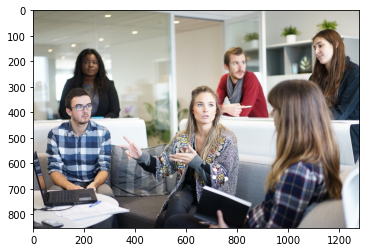

In [37]:
imagen = cv2.imread("/content/drive/MyDrive/imagenes/px-people.jpg")
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

In [38]:
imagen.shape

(853, 1280, 3)

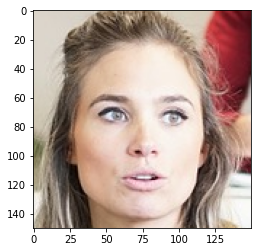

In [39]:
imagen_roi = imagen[300:450, 600:750]
plt.imshow(imagen_roi)

In [44]:
cv2.imwrite("/content/drive/MyDrive/imagenes/imagen_roi.png", imagen_roi)

True

In [43]:
imagen_roi_bgr = cv2.cvtColor(imagen_roi, cv2.COLOR_RGB2BGR)
cv2.imwrite("/content/drive/MyDrive/imagenes/imagen_roi_bgr.png", imagen_roi_bgr)

True

## 2. Segmentación de rostros

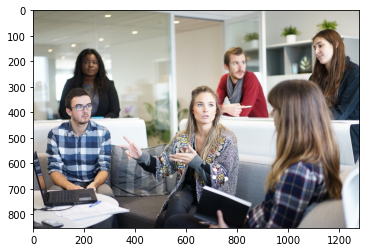

In [45]:
imagen = cv2.imread("/content/drive/MyDrive/imagenes/px-people.jpg")
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

In [46]:
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

In [47]:
clasificador = cv2.CascadeClassifier("/content/drive/MyDrive/clasificadores/haarcascade_frontalface_default.xml")

In [48]:
rostros = clasificador.detectMultiScale(imagen_gris, 1.3, 5)

In [49]:
len(rostros)

5

In [50]:
rostros[0]

array([189, 176,  75,  75], dtype=int32)

In [51]:
imagen_anotada = imagen.copy()

In [54]:
for (x, y, w, h) in rostros:
  cv2.rectangle(imagen_anotada, (x,y), (x+w, y+h), (255, 255, 0), 2)

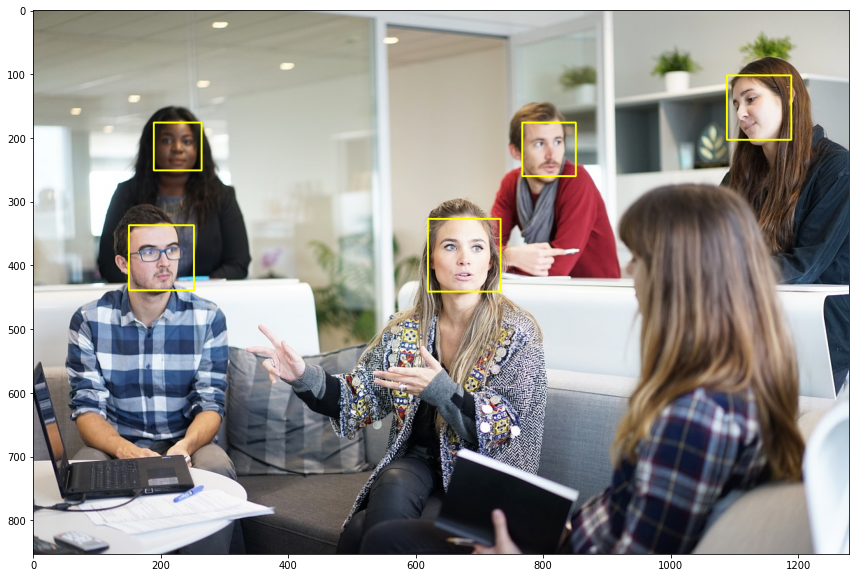

In [56]:
plt.figure(figsize=(20,10))
plt.imshow(imagen_anotada)

In [60]:
rostro_imagen = 0

for (x,y,w,h) in rostros:
    rostro_imagen += 1
    imagen_roi = imagen[y:y+h, x:x+w]
    imagen_roi = cv2.cvtColor(imagen_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite('/content/drive/MyDrive/imagenes/rostro_' + str(rostro_imagen) + '.png', imagen_roi)

## 3. Clasificación de rostros

In [80]:
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil

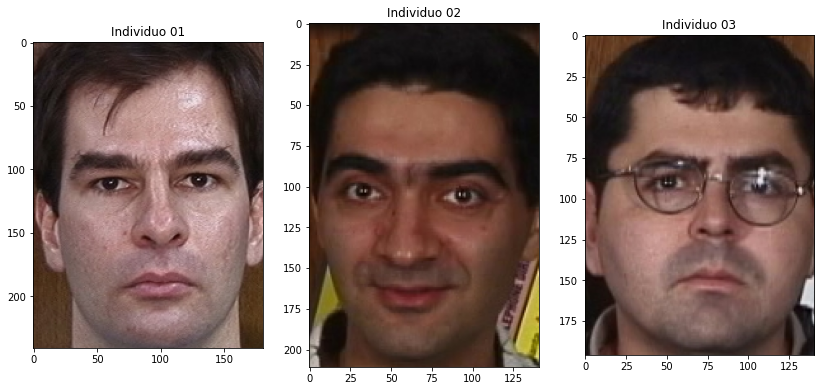

In [77]:
rostros = []
plt.figure(figsize= (14,7)) 

for i in range(1,4):
  rostro = cv2.imread(f"/content/drive/MyDrive/imagenes/cropped_faces/s0{i}_01.jpg")
  rostro = cv2.cvtColor(rostro,cv2.COLOR_BGR2RGB)
  rostros.append(rostro)   
  plt.subplot(130+i)
  plt.title(f"Individuo 0{i}")
  plt.imshow(rostro)

plt.show()

In [79]:
print(rostros[0].shape, rostros[1].shape, rostros[2].shape)

(241, 181, 3) (211, 141, 3) (196, 141, 3)


In [81]:
rostros_path = "/content/drive/MyDrive/imagenes/cropped_faces/"
lista_archivo_rostros = [f for f in listdir(rostros_path) if isfile(join(rostros_path, f))]

In [84]:
lista_archivo_rostros[0]

's04_08.jpg'

In [82]:
len(lista_archivo_rostros)

750

In [85]:
rostros_path_train = "/content/drive/MyDrive/imagenes/train/"
rostros_path_test = "/content/drive/MyDrive/imagenes/test/"

if not path.exists(rostros_path_train):
    makedirs(rostros_path_train)

if not path.exists(rostros_path_test):
    makedirs(rostros_path_test)

for archivo in lista_archivo_rostros:
    individuo = archivo[1:3]
    numero = archivo[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(rostros_path + archivo, rostros_path_train + archivo)
    else:
        shutil.copyfile(rostros_path + archivo, rostros_path_test + archivo)

In [86]:
def estandarizar_imagen(imagen_path):
    imagen = cv2.imread(imagen_path, cv2.IMREAD_GRAYSCALE)
    imagen = cv2.resize(imagen, (200, 200), interpolation=cv2.INTER_LANCZOS4)
    return imagen

In [87]:
lista_rostros_train = [f for f in listdir(rostros_path_train) if isfile(join(rostros_path_train, f))]
lista_rostros_test = [f for f in listdir(rostros_path_test) if isfile(join(rostros_path_test, f))]

In [91]:
print(f"{lista_rostros_train[0]}\n{lista_rostros_test[0]}")

s04_08.jpg
s03_15.jpg


In [92]:
datos_train, individuos_train = [],[]

for i, archivo in enumerate(lista_rostros_train):
    imagen_path = rostros_path_train + archivo
    imagen = estandarizar_imagen(imagen_path)
    datos_train.append(imagen)
    individuo = archivo[1:3]
    individuos_train.append(int(individuo))

In [93]:
datos_test, individuos_test = [],[]

for i, archivo in enumerate(lista_rostros_test):
    imagen_path = rostros_path_test + archivo
    imagen = estandarizar_imagen(imagen_path)
    datos_test.append(imagen)
    individuo = archivo[1:3]
    individuos_test.append(int(individuo))

In [94]:
len(datos_train), len(individuos_train)

(500, 500)

In [95]:
len(datos_test), len(individuos_test)

(250, 250)

Text(0.5, 1.0, 'Individuo 4')

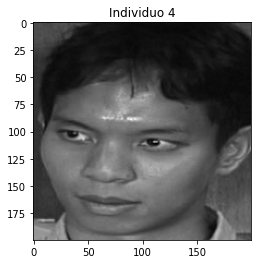

In [100]:
plt.imshow(datos_train[0], cmap="gray")
plt.title("Individuo " + str(individuos_train[0]))

Text(0.5, 1.0, 'Individuo 3')

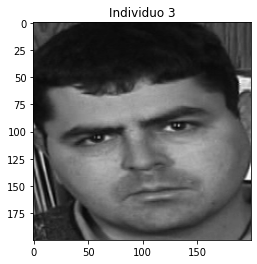

In [101]:
plt.imshow(datos_test[0], cmap="gray")
plt.title("Individuo " + str(individuos_test[0]))

## 4. Algoritmos de clasificación

### EigenFaces

In [230]:
import numpy as np
from sklearn.metrics import accuracy_score

In [113]:
individuos_train = np.asarray(individuos_train, dtype=np.int32)
individuos_test = np.asarray(individuos_test, dtype=np.int32)

In [120]:
modelo_eigenfaces = cv2.face.EigenFaceRecognizer_create()

In [121]:
modelo_eigenfaces.train(datos_train, individuos_train)

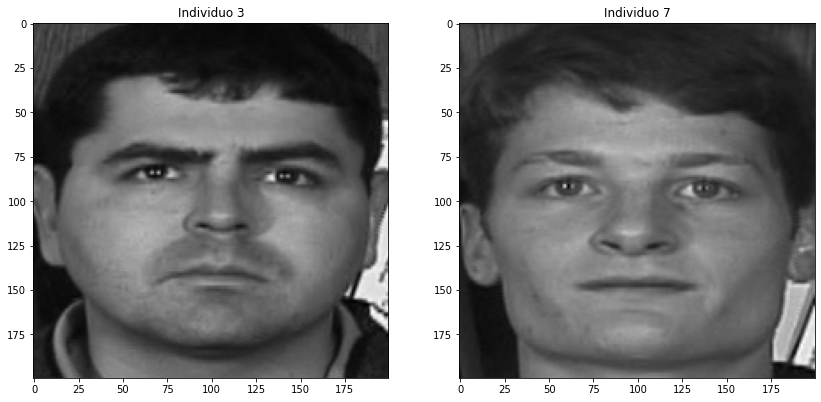

In [140]:
plt.figure(figsize=(14,8))

plt.subplot(121)
plt.title("Individuo " + str(individuos_test[2]))
plt.imshow(datos_test[2], cmap="gray")

plt.subplot(122)
plt.title("Individuo " + str(individuos_test[15]))
plt.imshow(datos_test[15], cmap="gray")

plt.show()

In [141]:
prediccion = modelo_eigenfaces.predict(datos_test[2])
prediccion

(3, 3855.2936158618463)

In [142]:
prediccion = modelo_eigenfaces.predict(datos_test[15])
prediccion

(7, 3946.532428238551)

### Fisherfaces

In [143]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [144]:
modelo_fisherfaces.train(datos_train, individuos_train)

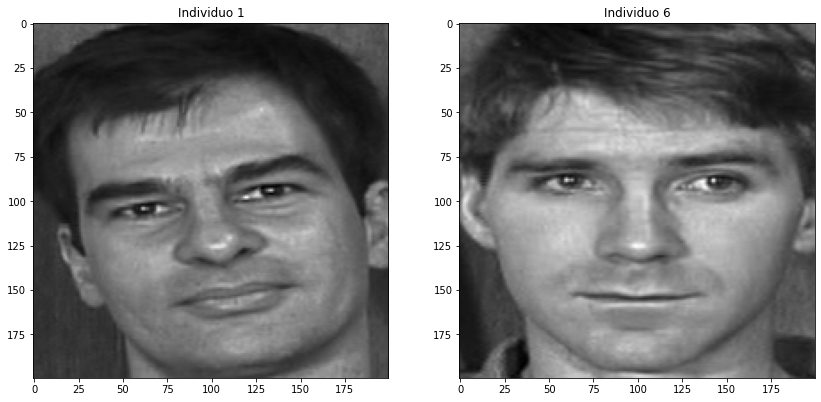

In [149]:
plt.figure(figsize=(14,8))

plt.subplot(121)
plt.title("Individuo " + str(individuos_test[13]))
plt.imshow(datos_test[13], cmap="gray")

plt.subplot(122)
plt.title("Individuo " + str(individuos_test[23]))
plt.imshow(datos_test[23], cmap="gray")

plt.show()

In [148]:
prediccion = modelo_fisherfaces.predict(datos_test[13])
prediccion

(1, 808.3653697481216)

In [150]:
prediccion = modelo_fisherfaces.predict(datos_test[23])
prediccion

(6, 723.4168316699391)

### LBPH (Linear Binary Pattern Histogram)

In [151]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [152]:
modelo_lbph.train(datos_train, individuos_train)

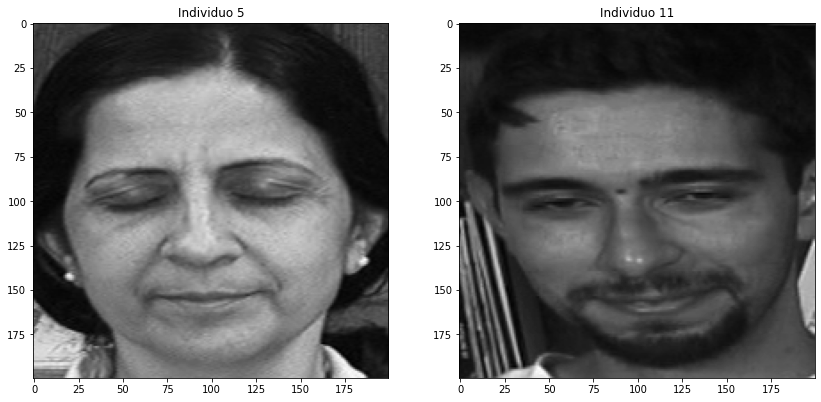

In [154]:
plt.figure(figsize=(14,8))

plt.subplot(121)
plt.title("Individuo " + str(individuos_test[27]))
plt.imshow(datos_test[27], cmap="gray")

plt.subplot(122)
plt.title("Individuo " + str(individuos_test[35]))
plt.imshow(datos_test[35], cmap="gray")

plt.show()

In [155]:
prediccion = modelo_lbph.predict(datos_test[27])
prediccion

(5, 32.938584374874814)

In [156]:
prediccion = modelo_lbph.predict(datos_test[35])
prediccion

(11, 37.887876144570534)

In [231]:
def exactitud(modelo):
  puntuacion =[]
  for item in datos_test:
    puntuacion.append(modelo.predict(item)[0])
  resultado = accuracy_score(individuos_test, puntuacion)
  return resultado

In [233]:
exactitud(modelo_eigenfaces)

0.724

In [234]:
exactitud(modelo_fisherfaces)

0.52

In [235]:
exactitud(modelo_lbph)

0.792

## 5. Marcos faciales

In [237]:
import dlib
from scipy.spatial import distance as dist

In [238]:
imagen = cv2.imread("/content/drive/MyDrive/imagenes/px-woman-smilings.jpg")
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

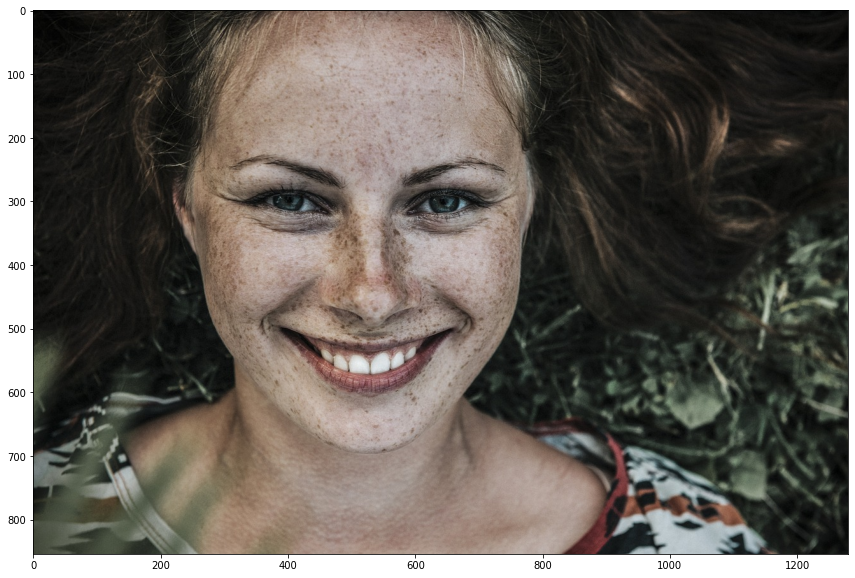

In [239]:
plt.figure(figsize=(20,10))
plt.imshow(imagen)

In [240]:
clasificador_dlib_68_path = "/content/drive/MyDrive/clasificadores/shape_predictor_68_face_landmarks.dat"
clasificador_dlib = dlib.shape_predictor(clasificador_dlib_68_path)
detector_facial = dlib.get_frontal_face_detector()

In [241]:
def anotar_rostro(imagen):
    rectangulos = detector_facial(imagen, 1)
    
    if len(rectangulos) == 0:
        return None
    
    for k, d in enumerate(rectangulos):
        print("Identificado rostro " + str(k))
        cv2.rectangle(imagen, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)
    
    return imagen

In [242]:
imagen_anotada = imagen.copy()
imagen_anotada = anotar_rostro(imagen_anotada)

Identificado rostro 0


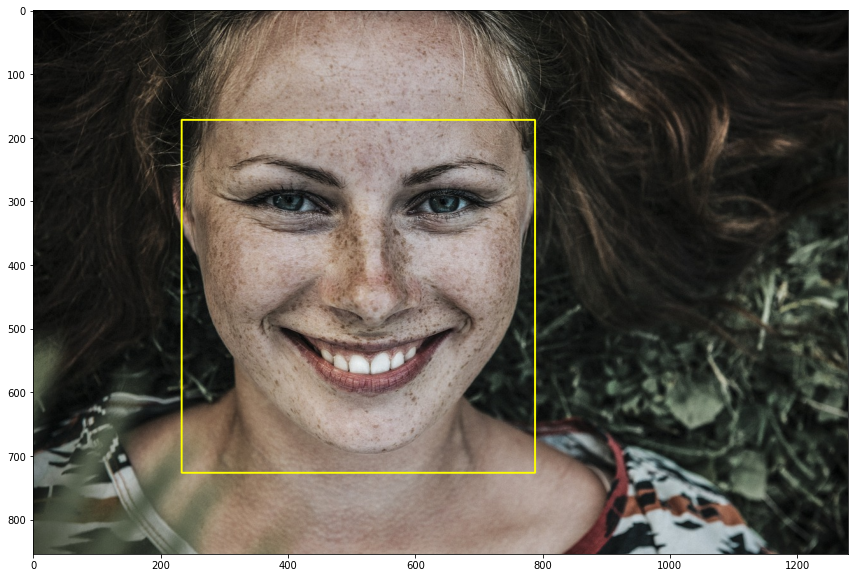

In [243]:
plt.figure(figsize=(20,10))
plt.imshow(imagen_anotada)

In [244]:
def puntos_marcos_faciales(imagen):
    rectangulos = detector_facial(imagen, 1)
    
    if len(rectangulos) == 0:
        return None
    
    marcos = []
    
    for rec in rectangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in clasificador_dlib(imagen,rec).parts()]))
    
    return marcos

In [245]:
marcos_faciales = puntos_marcos_faciales(imagen)

In [246]:
len(marcos_faciales[0])

68

In [248]:
def anotar_marcos_faciales(imagen, marcos):
    
    for marco in marcos:
        for idx, punto in enumerate(marco):
            centro = (punto[0,0], punto[0,1])
            cv2.circle(imagen, centro, 3, (255,255,0), -1)
            cv2.putText(imagen, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.3,
                       (0,0,255), 1)
    
    return imagen

In [249]:
imagen_anotada = imagen.copy()
imagen_anotada = anotar_marcos_faciales(imagen_anotada, marcos_faciales)

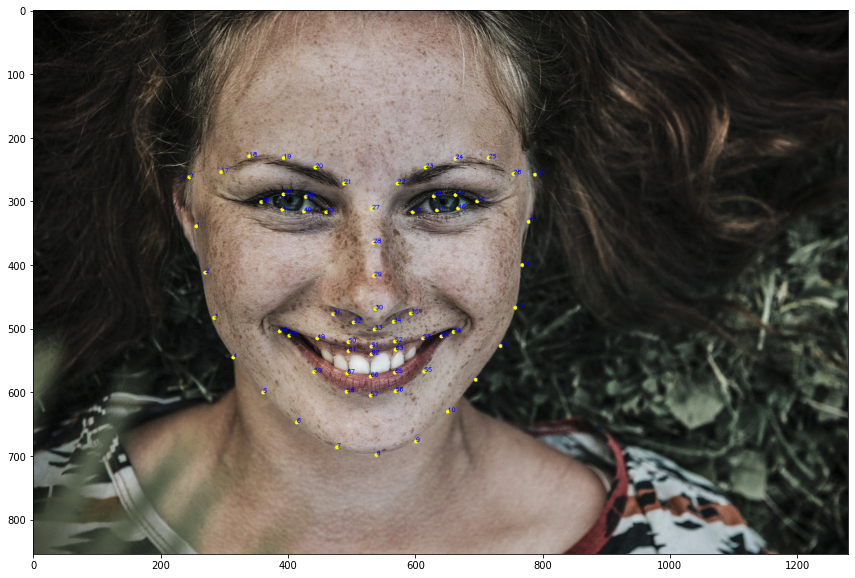

In [250]:
plt.figure(figsize=(20,10))
plt.imshow(imagen_anotada)

In [251]:
ROSTRO = list(range(17, 68))
ROSTRO_COMPLETO = list(range(0, 68))
LABIOS = list(range(48, 60))
BOCA = list(range(60,68))
CEJA_DER = list(range(17, 22))
CEJA_IZQ = list(range(22, 27))
OJO_DER = list(range(36,42))
OJO_IZQ = list(range(42,48))
NARIZ = list(range(27,36))
MANDIBULA = list(range(0,17))

In [252]:
def aspecto_razon_ojos(puntos_ojos):
    
    a = dist.euclidean(puntos_ojos[1], puntos_ojos[5])
    b = dist.euclidean(puntos_ojos[2], puntos_ojos[4])
    c = dist.euclidean(puntos_ojos[0], puntos_ojos[3])
    
    aspecto_razon = (a + b)/(2 * c)
    
    return aspecto_razon

In [253]:
def anotar_marcos_casco_convexo(imagen, marcos):
    rectangulos = detector_facial(imagen, 1)
    
    if len(rectangulos) == 0:
        return None
    
    for idx, rec in enumerate(rectangulos):
        marco = marcos[idx]
        
        puntos = cv2.convexHull(marco[OJO_IZQ])
        cv2.drawContours(imagen, [puntos], 0, (0,255,0), 2)
        
        puntos = cv2.convexHull(marco[OJO_DER])
        cv2.drawContours(imagen, [puntos], 0, (0,255,0), 2)
    
    return imagen

In [254]:
def anotar_marcos_casco_convexo_boca(imagen, marcos):
    rectangulos = detector_facial(imagen, 1)
    
    if len(rectangulos) == 0:
        return None
    
    for idx, rec in enumerate(rectangulos):
        marco = marcos[idx]
        
        puntos = cv2.convexHull(marco[BOCA])
        cv2.drawContours(imagen, [puntos], 0, (0,255,0), 2)

    return imagen

In [256]:
imagen_anotada = imagen.copy()
imagen_anotada = anotar_marcos_casco_convexo(imagen_anotada, marcos_faciales)

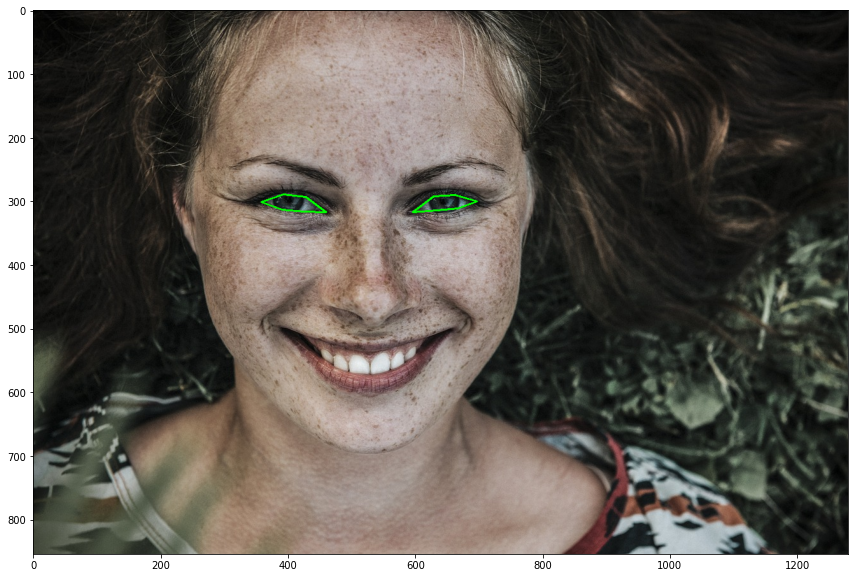

In [257]:
plt.figure(figsize=(20,10))
plt.imshow(imagen_anotada)

In [258]:
valor_ojo_izq = aspecto_razon_ojos(marcos_faciales[0][OJO_IZQ])
valor_ojo_izq

0.21450051712603885

In [259]:
valor_ojo_der = aspecto_razon_ojos(marcos_faciales[0][OJO_DER])
valor_ojo_der

0.22895527127621407

In [260]:
def aspecto_razon_boca(puntos_boca):
    a = dist.euclidean(puntos_boca[1], puntos_boca[7])
    b = dist.euclidean(puntos_boca[2], puntos_boca[6])
    c = dist.euclidean(puntos_boca[3], puntos_boca[5])
    d = dist.euclidean(puntos_boca[0], puntos_boca[4])
    
    aspecto_razon = (a + b + c)/(3*d)
    
    return aspecto_razon

In [261]:
imagen_anotada = imagen.copy()
imagen_anotada = anotar_marcos_casco_convexo_boca(imagen_anotada, marcos_faciales)

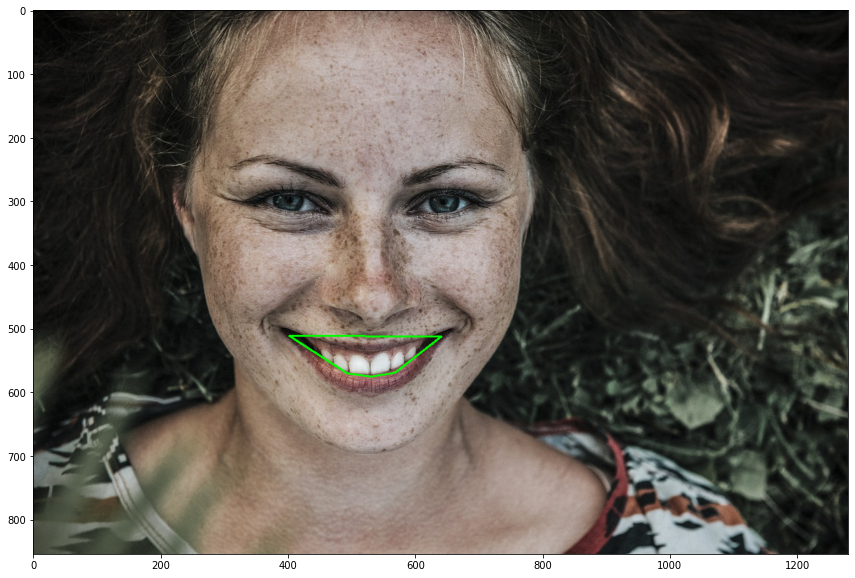

In [262]:
plt.figure(figsize=(20,10))
plt.imshow(imagen_anotada)

In [263]:
valor_boca = aspecto_razon_boca(marcos_faciales[0][BOCA])
valor_boca

0.14795583920168573

## 6. Aplicaciones del análisis facial

In [265]:
from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

In [266]:
def estandarizar_imagen(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (1920, 1080))
    return frame

In [267]:
def exhibir_video(frame):
    img = Img.fromarray(frame, "RGB")
    buffer = BytesIO()
    img.save(buffer, format="JPEG")
    display(Image(data=buffer.getvalue()))
    clear_output(wait=True)

In [268]:
video = cv2.VideoCapture("/content/drive/MyDrive/videos/expresiones.mov")

try:
    while(True):
        captura_ok, frame = video.read()
        if captura_ok:
            frame = estandarizar_imagen(frame)
            exhibir_video(frame)
except KeyboardInterrupt:
    video.release()
    print("Interrumpido")

Interrumpido


In [ ]:
try:
    ar_max = 0
    video = cv2.VideoCapture("/content/drive/MyDrive/videos/bostezo.mov")
    while(True):
        captura_ok, frame = video.read()
        if captura_ok:
            frame = estandarizar_imagen(frame)
            marcos_faciales = puntos_marcos_faciales(frame)
            
            if marcos_faciales is not None:
                ar_boca = aspecto_razon_boca(marcos_faciales[0][BOCA])
                ar_boca = round(ar_boca, 3)
                
                if ar_boca > ar_max:
                    ar_max = ar_boca
                
                info = "Boca " + str(ar_boca) + " Maximo " + str(ar_max)
                
                frame = anotar_marcos_casco_convexo_boca(frame, marcos_faciales)
                cv2.putText(frame, info, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
            
            exhibir_video(frame)
            
except KeyboardInterrupt:
    video.release()
    print("Interrumpido")

Interrumpido


In [24]:
try:
    min_ojo_izq = 1
    min_ojo_der = 1
    max_ojo_izq = 0
    max_ojo_der = 0
    
    video = cv2.VideoCapture("/content/drive/MyDrive/videos/ojos_cerrados.mov")
    
    while(True):
        captura_ok, frame = video.read()
        if captura_ok:
          frame = estandarizar_imagen(frame)        
          marcos_faciales = puntos_marcos_faciales(frame)
        
          if marcos_faciales is not None:
            ar_ojo_izq = aspecto_razon_ojos(marcos_faciales[0][OJO_IZQ])
            ar_ojo_der = aspecto_razon_ojos(marcos_faciales[0][OJO_DER])
            
            ar_ojo_izq = round(ar_ojo_izq, 3)
            ar_ojo_der = round(ar_ojo_der, 3)
            
            if ar_ojo_izq < min_ojo_izq: 
                min_ojo_izq = ar_ojo_izq
            if ar_ojo_izq > max_ojo_izq:
                max_ojo_izq = ar_ojo_izq
            if ar_ojo_der < min_ojo_der: 
                min_ojo_der = ar_ojo_der
            if ar_ojo_der > max_ojo_der:
                max_ojo_der = ar_ojo_der     
            info_ojo_izq = "Ojo izquierdo " + str(ar_ojo_izq) + " minimo " + str(min_ojo_izq) + " maximo " + str(max_ojo_izq)
            info_ojo_der = "Ojo derecho " + str(ar_ojo_der) + " minimo " + str(min_ojo_der) + " maximo " + str(max_ojo_der)
            
            frame = anotar_marcos_casco_convexo(frame, marcos_faciales)
            
            cv2.putText(frame, info_ojo_izq, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
            cv2.putText(frame, info_ojo_der, (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
            
          exhibir_video(frame)
        
except KeyboardInterrupt:
    video.release()
    print("Interrumpido")

Interrumpido
